## Boston House Dataset

### Section 1. Exploratory Analysis

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

X = boston.data
Y = boston.target

print(X.shape,Y.shape)

(506, 13) (506,)


C:\Users\DELL INDIA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include

In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
u = np.mean(X,axis = 0)
std = np.std(X,axis = 0)
print(u.shape,std.shape)

(13,) (13,)


In [9]:
# Normalise the data
X = (X-u)/std

### Section 2. Linear Regression on Multiple Features

In [10]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
X.shape

(506, 14)

In [21]:
def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_ += (theta[i]*x[i])
    return y_

def error(X,Y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (Y[i]-y_)**2
    return e/m

def gradient(X,Y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    # for all values of j
    for j in range(n):
        # sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_-Y[i])*X[i][j]
    return grad/m

def gradient_descent(X,Y,learning_rate = 0.1,max_epochs = 300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_epochs):
        e = error(X,Y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X,Y,theta)
        for j in range(n):
            theta[j] -= learning_rate*grad[j]
            
    return theta,error_list

In [22]:
theta,error_list = gradient_descent(X,Y)

In [23]:
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


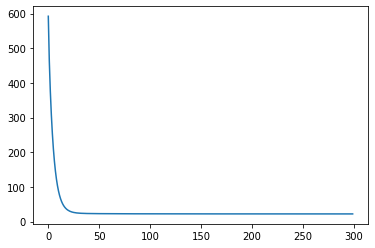

In [25]:
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

In [26]:
import time
start = time.time()
theta,error_list = gradient_descent(X,Y)
end = time.time()
print("Time taken is ",end-start)

Time taken is  8.294041395187378


## Predictions 

In [27]:
Y_ = []
m = X.shape[0]
for i in range(m):
    pred = hypothesis(X[i],theta)
    Y_.append(pred)
    
Y_ = np.array(Y_)

In [29]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = 1 - num/denom
    return score*100

In [30]:
r2_score(Y,Y_)

74.04541323942743

### Section 3. Optimising Code using Vectorization
An efficient implementation for linear regression using vectorization
- Avoid loops in the implementation, except the gradient descent main loop
- Use numpy functions like ```np.sum()```, ```np.dot()``` which are quite fast and already optimised

In [31]:
def hypothesis_op(X,theta):
    return np.dot(X,theta)

def error_op(X,Y,theta):
    error = 0.0
    m = X.shape[0]
    y_ = hypothesis_op(X,theta)
    e = np.sum((Y-y_)**2)
    return e/m

def gradient_op(X,Y,theta):
    m = X.shape[0]
    y_ = hypothesis_op(X,theta)
    grad = np.dot(X.T,(y_-Y))
    return grad/m

def gradient_descent_op(X,Y,learning_rate = 0.1,max_iters = 300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error_op(X,Y,theta)
        error_list.append(e)
        
        grad = gradient_op(X,Y,theta)
        theta -= learning_rate*grad
    return theta,error_list

In [32]:
start = time.time()
theta,error_list = gradient_descent_op(X,Y)
end = time.time()
print("Time taken by vectorized code is ",end-start)

Time taken by vectorized code is  0.007999897003173828


In [33]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

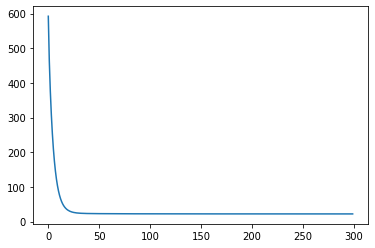

In [34]:
plt.plot(error_list)
plt.show()

In [35]:
y_ = hypothesis_op(X,theta)
r2_score(Y,y_)

74.04541323942743